# <font color = lightcoral>EDA Visuals - After pruning
>    
>df_full_clean_04

## <font color = grey> Admin

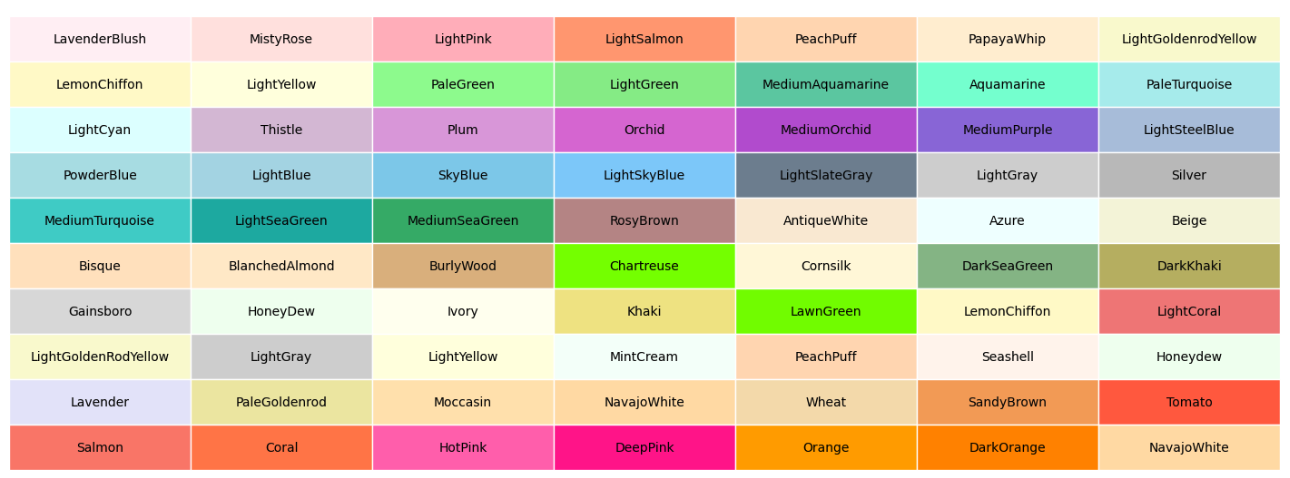

In [14]:
import pandas as pd
import os
import gzip
import time
import warnings
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [15]:
# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

Base directory set to: /root


___
# <font color = darkkhaki> Load pruned dataset

In [16]:
import pandas as pd
import time
import os

# Start timing
start_time = time.time()

# Define the EFS file path
efs_file_path = os.path.join(base_dir, '11.Data/01.BGL/06.df_full_clean_04/df_full_clean_04.parquet')

df_full_wip = pd.read_parquet(efs_file_path)
display(df_full_wip.head())

end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")

,AlertStatus,ID,Date,Seq_ID_1,Timestamp,Seq_ID_2,Category,Component,Message_Type,Message_Body
0,Normal,1117838570,2005-06-03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
1,Normal,1117838570,2005-06-03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
2,Normal,1117838570,2005-06-03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
3,Normal,1117838570,2005-06-03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
4,Normal,1117838570,2005-06-03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected



____________________________________________________________________________________________________

Time taken: 2.93 seconds


In [17]:
# Check the format of the Timestamp column
print(df_full_wip['Timestamp'].head(10))

0   2005-06-03 15:42:50.363779
1   2005-06-03 15:42:50.527847
2   2005-06-03 15:42:50.675872
3   2005-06-03 15:42:50.823719
4   2005-06-03 15:42:50.982731
5   2005-06-03 15:42:51.131467
6   2005-06-03 15:42:51.293532
7   2005-06-03 15:42:51.428563
8   2005-06-03 15:42:51.601412
9   2005-06-03 15:42:51.749199
Name: Timestamp, dtype: datetime64[ns]


___
# <font color = darkkhaki> Review of Basic Stats

## <font color = lightslategrey> Basic Stats

In [18]:
import pandas as pd
import time
import os

# Start timing
start_time = time.time()

# Initialize counters for total count, alert count, and normal count
total_count = len(df_full_wip)
alert_count = (df_full_wip['AlertStatus'] == 'Alert').sum()
normal_count = (df_full_wip['AlertStatus'] == 'Normal').sum()

# Initialize sets for unique values
unique_ids = df_full_wip['ID'].nunique()
unique_seq_id_1 = df_full_wip['Seq_ID_1'].nunique()
unique_seq_id_2 = df_full_wip['Seq_ID_2'].nunique()
unique_categories = df_full_wip['Category'].nunique()
unique_components = df_full_wip['Component'].nunique()
unique_message_types = df_full_wip['Message_Type'].nunique()
unique_message_bodies = df_full_wip['Message_Body'].nunique()

# Calculate alert percentage
alert_percentage = (alert_count / total_count) * 100 if total_count > 0 else 0

# Calculate min date, max date, and duration
min_date = pd.to_datetime(df_full_wip['Date']).min()
max_date = pd.to_datetime(df_full_wip['Date']).max()
duration_days = (max_date - min_date).days

# Calculate averages
average_messages_per_day = total_count / duration_days if duration_days > 0 else 0
average_alerts_per_day = alert_count / duration_days if duration_days > 0 else 0

# Calculate daily alerts
df_full_wip['Date'] = pd.to_datetime(df_full_wip['Date'])
daily_alerts = df_full_wip[df_full_wip['AlertStatus'] == 'Alert'].groupby('Date').size()

# Calculate max and min daily total alerts
max_daily_alerts = daily_alerts.max() if not daily_alerts.empty else 0
min_daily_alerts = daily_alerts.min() if not daily_alerts.empty else 0

# Top 10 days with the max daily alerts in descending order
top_10_days_max_alerts = daily_alerts.nlargest(10) if not daily_alerts.empty else pd.Series()

# Count records where Seq_ID_1 and Seq_ID_2 are not the same
not_equal_count = df_full_wip[df_full_wip['Seq_ID_1'] != df_full_wip['Seq_ID_2']].shape[0]

# Count based on AlertStatus and Message_Type for the 314 records
not_equal_df = df_full_wip[df_full_wip['Seq_ID_1'] != df_full_wip['Seq_ID_2']]
alert_status_counts = not_equal_df['AlertStatus'].value_counts()
message_type_counts = not_equal_df['Message_Type'].value_counts()

# Print the results
print("\nResults for Total Count, Alert Count, Normal Count, Alert Percentage:")
print(f"Total Count: {total_count}")
print(f"Alert Count: {alert_count}")
print(f"Normal Count: {normal_count}")
print(f"Alert Percentage: {alert_percentage:.2f}%")
print("\n" + "_"*100)

print("\nResults for Distinct ID Count:")
print(f"Distinct ID Count: {unique_ids}")
print("\n" + "_"*100)

print("\nResults for Distinct Seq_ID_1 Count:")
print(f"Distinct Seq_ID_1 Count: {unique_seq_id_1}")
print("\n" + "_"*100)

print("\nResults for Distinct Seq_ID_2 Count:")
print(f"Distinct Seq_ID_2 Count: {unique_seq_id_2}")
print("\n" + "_"*100)

print("\nResults for Distinct Category Count:")
print(f"Distinct Category Count: {unique_categories}")
print("\n" + "_"*100)

print("\nResults for Distinct Component Count:")
print(f"Distinct Component Count: {unique_components}")
print("\n" + "_"*100)

print("\nResults for Distinct Message_Type Count:")
print(f"Distinct Message_Type Count: {unique_message_types}")
print("\n" + "_"*100)

print("\nResults for Distinct Message_Body Count:")
print(f"Distinct Message_Body Count: {unique_message_bodies}")
print("\n" + "_"*100)

print("\nResults for Date Range and Averages:")
print(f"Min Date: {min_date}")
print(f"Max Date: {max_date}")
print(f"Duration (days): {duration_days}")
print(f"Average Messages per Day: {average_messages_per_day:.2f}")
print(f"Average Alerts per Day: {average_alerts_per_day:.2f}")
print("\n" + "_"*100)

print("\nResults for Daily Alerts:")
print(f"Max Daily Total Alerts: {max_daily_alerts}")
print(f"Min Daily Total Alerts: {min_daily_alerts}")
print("\nTop 10 Days with Max Daily Alerts (in descending order):")
print(top_10_days_max_alerts)
print("\n" + "_"*100)

print("\nResults for Seq_ID_1 and Seq_ID_2 Comparison:")
print(f"Count of records where Seq_ID_1 and Seq_ID_2 are not the same: {not_equal_count}")
print("\n" + "_"*100)

print("\nCount of records where Seq_ID_1 and Seq_ID_2 are not the same by AlertStatus:")
print(alert_status_counts)
print("\n" + "_"*100)

print("\nCount of records where Seq_ID_1 and Seq_ID_2 are not the same by Message_Type:")
print(message_type_counts)
print("\n" + "_"*100)

# End timing
end_time = time.time()
duration = end_time - start_time
print(f"\nTime taken to run the entire block: {duration:.2f} seconds")



Results for Total Count, Alert Count, Normal Count, Alert Percentage:
Total Count: 4747950
Alert Count: 348698
Normal Count: 4399252
Alert Percentage: 7.34%

____________________________________________________________________________________________________

Results for Distinct ID Count:
Distinct ID Count: 299847

____________________________________________________________________________________________________

Results for Distinct Seq_ID_1 Count:
Distinct Seq_ID_1 Count: 69252

____________________________________________________________________________________________________

Results for Distinct Seq_ID_2 Count:
Distinct Seq_ID_2 Count: 69255

____________________________________________________________________________________________________

Results for Distinct Category Count:
Distinct Category Count: 3

____________________________________________________________________________________________________

Results for Distinct Component Count:
Distinct Component Count: 10

__

---

___
## <font color = lightslategrey> Basic Plots

---

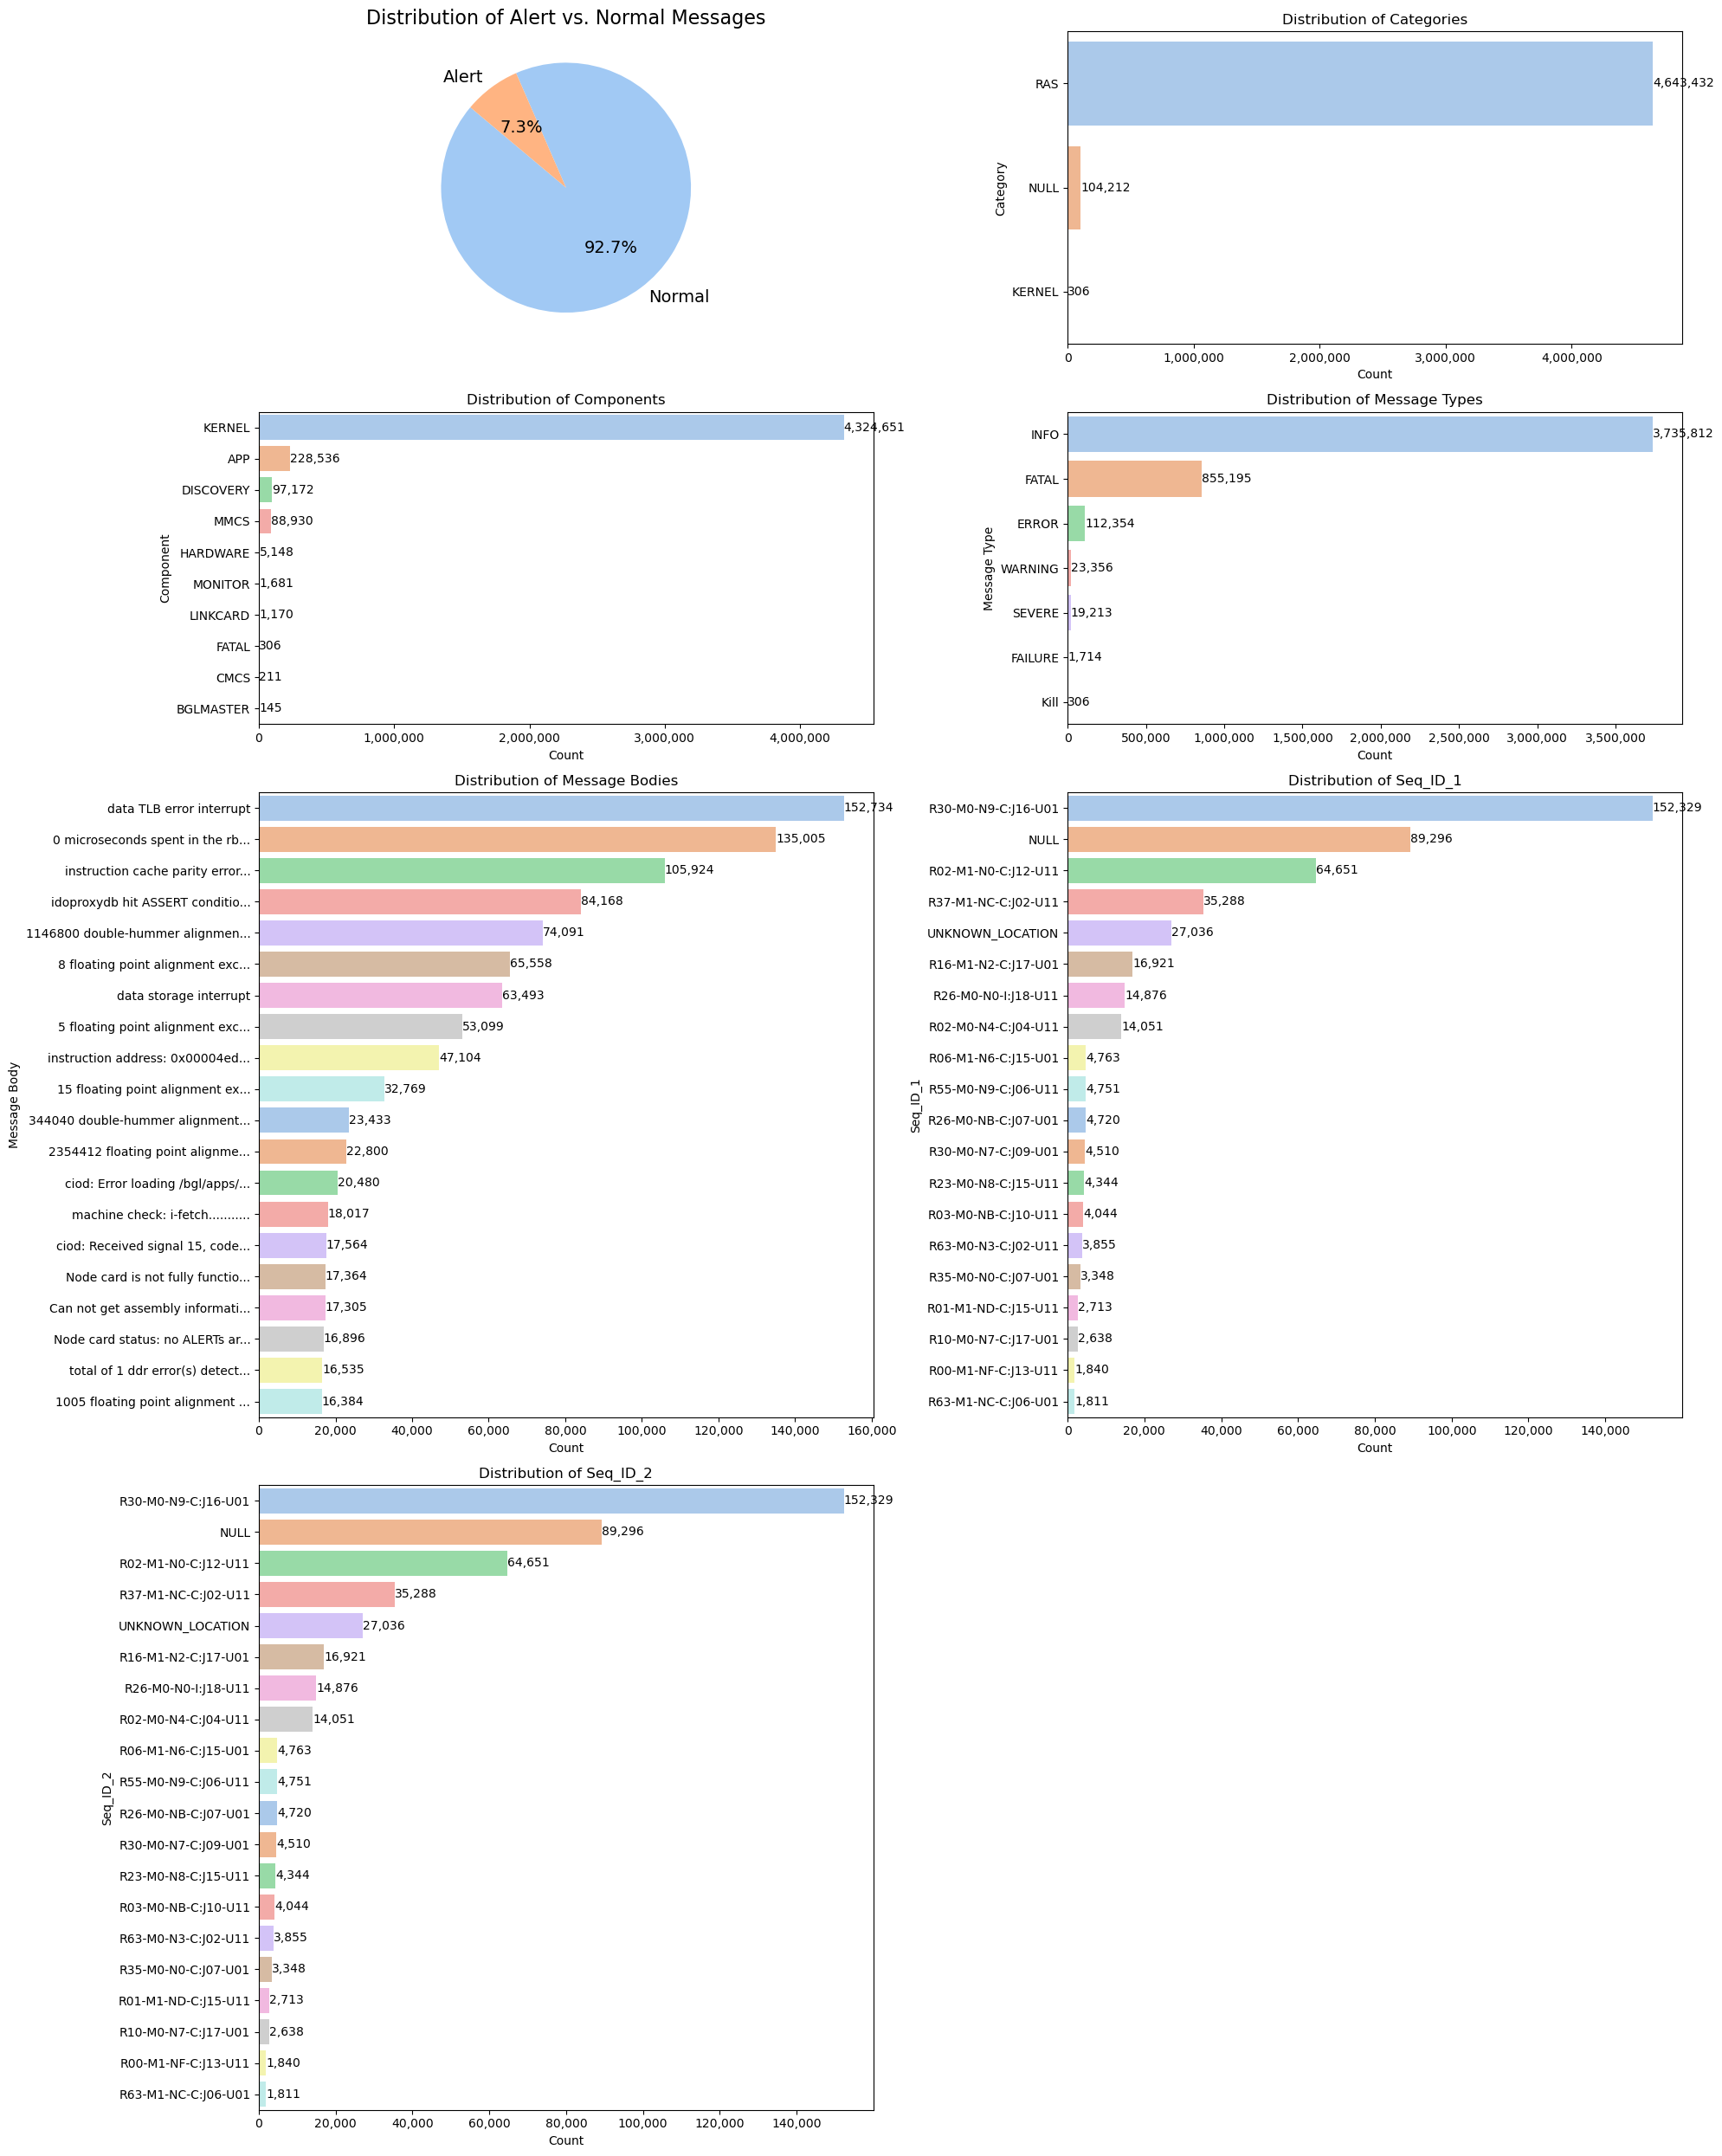


Time taken: 4.12 seconds


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import time
import os

# Function to format y-axis with commas
def y_format(value, tick_number):
    return f'{int(value):,}'

# Start timing
start_time = time.time()

# Plotting configurations
fig, axs = plt.subplots(4, 2, figsize=(20, 25), gridspec_kw={'height_ratios': [1, 1, 2, 2]})
palette = sns.color_palette("pastel")

# Subplot 1: Distribution of Alert vs. Normal Messages (Pie Chart)
alert_status_counts_df = df_full_wip['AlertStatus'].value_counts().reset_index()
alert_status_counts_df.columns = ['AlertStatus', 'Count']
alert_status_counts_df = alert_status_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

axs[0, 0].pie(alert_status_counts_df['Count'], labels=alert_status_counts_df['AlertStatus'], autopct='%1.1f%%', colors=palette, startangle=140, textprops={'fontsize': 14})
axs[0, 0].set_title('Distribution of Alert vs. Normal Messages', fontsize=16)

# Subplot 2: Distribution of Categories (Bar Plot)
category_counts_df = df_full_wip['Category'].value_counts().reset_index()
category_counts_df.columns = ['Category', 'Count']
category_counts_df = category_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

plt.subplot(4, 2, 2)
ax2 = sns.barplot(data=category_counts_df, y='Category', x='Count', palette=palette, ax=axs[0, 1])
plt.title('Distribution of Categories')
plt.xlabel('Count')
plt.ylabel('Category')
ax2.xaxis.set_major_formatter(FuncFormatter(y_format))
for container in ax2.containers:
    labels = [f'{int(value):,}' for value in container.datavalues]
    ax2.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

# Subplot 3: Distribution of Components (Bar Plot)
component_counts_df = df_full_wip['Component'].value_counts().reset_index()
component_counts_df.columns = ['Component', 'Count']
component_counts_df = component_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

plt.subplot(4, 2, 3)
ax3 = sns.barplot(data=component_counts_df, y='Component', x='Count', palette=palette, ax=axs[1, 0])
plt.title('Distribution of Components')
plt.xlabel('Count')
plt.ylabel('Component')
ax3.xaxis.set_major_formatter(FuncFormatter(y_format))
for container in ax3.containers:
    labels = [f'{int(value):,}' for value in container.datavalues]
    ax3.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

# Subplot 4: Distribution of Message Types (Bar Plot)
message_type_counts_df = df_full_wip['Message_Type'].value_counts().reset_index()
message_type_counts_df.columns = ['Message_Type', 'Count']
message_type_counts_df = message_type_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

plt.subplot(4, 2, 4)
ax4 = sns.barplot(data=message_type_counts_df, y='Message_Type', x='Count', palette=palette, ax=axs[1, 1])
plt.title('Distribution of Message Types')
plt.xlabel('Count')
plt.ylabel('Message Type')
ax4.xaxis.set_major_formatter(FuncFormatter(y_format))
for container in ax4.containers:
    labels = [f'{int(value):,}' for value in container.datavalues]
    ax4.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

# Subplot 5: Distribution of Message Bodies (Bar Plot)
message_body_counts_df = df_full_wip['Message_Body'].value_counts().reset_index()
message_body_counts_df.columns = ['Message_Body', 'Count']
message_body_counts_df = message_body_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
top_20_message_body_counts_df = message_body_counts_df.head(20)
top_20_message_body_counts_df['Truncated_Message_Body'] = top_20_message_body_counts_df['Message_Body'].apply(lambda x: x[:30] + '...' if len(x) > 30 else x)

plt.subplot(4, 2, 5)
ax5 = sns.barplot(data=top_20_message_body_counts_df, y='Truncated_Message_Body', x='Count', palette=palette, ax=axs[2, 0])
plt.title('Distribution of Message Bodies')
plt.xlabel('Count')
plt.ylabel('Message Body')
ax5.xaxis.set_major_formatter(FuncFormatter(y_format))
for container in ax5.containers:
    labels = [f'{int(value):,}' for value in container.datavalues]
    ax5.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

# Subplot 6: Distribution of Seq_ID_1 (Bar Plot)
seq_id_1_counts_df = df_full_wip['Seq_ID_1'].value_counts().reset_index()
seq_id_1_counts_df.columns = ['Seq_ID_1', 'Count']
seq_id_1_counts_df = seq_id_1_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
top_20_seq_id_1_counts_df = seq_id_1_counts_df.head(20)
top_20_seq_id_1_counts_df['Truncated_Seq_ID_1'] = top_20_seq_id_1_counts_df['Seq_ID_1'].apply(lambda x: x[:30] + '...' if len(x) > 30 else x)

plt.subplot(4, 2, 6)
ax6 = sns.barplot(data=top_20_seq_id_1_counts_df, y='Truncated_Seq_ID_1', x='Count', palette=palette, ax=axs[2, 1])
plt.title('Distribution of Seq_ID_1')
plt.xlabel('Count')
plt.ylabel('Seq_ID_1')
ax6.xaxis.set_major_formatter(FuncFormatter(y_format))
for container in ax6.containers:
    labels = [f'{int(value):,}' for value in container.datavalues]
    ax6.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

# Subplot 7: Distribution of Seq_ID_2 (Bar Plot)
seq_id_2_counts_df = df_full_wip['Seq_ID_2'].value_counts().reset_index()
seq_id_2_counts_df.columns = ['Seq_ID_2', 'Count']
seq_id_2_counts_df = seq_id_2_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
top_20_seq_id_2_counts_df = seq_id_2_counts_df.head(20)
top_20_seq_id_2_counts_df['Truncated_Seq_ID_2'] = top_20_seq_id_2_counts_df['Seq_ID_2'].apply(lambda x: x[:30] + '...' if len(x) > 30 else x)

plt.subplot(4, 2, 7)
ax7 = sns.barplot(data=top_20_seq_id_2_counts_df, y='Truncated_Seq_ID_2', x='Count', palette=palette, ax=axs[3, 0])
plt.title('Distribution of Seq_ID_2')
plt.xlabel('Count')
plt.ylabel('Seq_ID_2')
ax7.xaxis.set_major_formatter(FuncFormatter(y_format))
for container in ax7.containers:
    labels = [f'{int(value):,}' for value in container.datavalues]
    ax7.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black')

# Hide the last subplot (3, 1) since it's not used
fig.delaxes(axs[3, 1])

plt.tight_layout()
plt.show()

# End timing
end_time = time.time()
duration = end_time - start_time
print(f"\nTime taken: {duration:.2f} seconds")

# <font color = tomato> TimeStamp conversion and save as 04

### Step 1: Convert the Timestamp Column and Save as Parquet

In [20]:
# import pandas as pd
# import os

# # Convert the Timestamp column to datetime
# df_full_wip['Timestamp'] = pd.to_datetime(df_full_wip['Timestamp'], format='%Y-%m-%d-%H.%M.%S.%f')

# # Save the updated dataframe as df_full_clean_04
# df_full_clean_04 = df_full_wip

# # Define the file path for saving the parquet file
# local_path = os.path.join(base_dir, '11.Data/01.BGL/06.df_full_clean_04/df_full_clean_04.parquet')

# # Save the dataframe to a parquet file
# df_full_clean_04.to_parquet(local_path)

# print(f"Dataframe saved to {local_path}")

### Step 2: Read the Parquet File Back into a Dataframe

In [21]:
# # Read the parquet file back into a dataframe
# df_full_clean_04_loaded = pd.read_parquet(local_path)

# # Display the first few rows to verify
# display(df_full_clean_04_loaded.head())

___
## <font color = lightslategrey> Temporal Plots

## <font color = tomato> Alerts Only

#### <font color = darkseagreen> Normal Scale

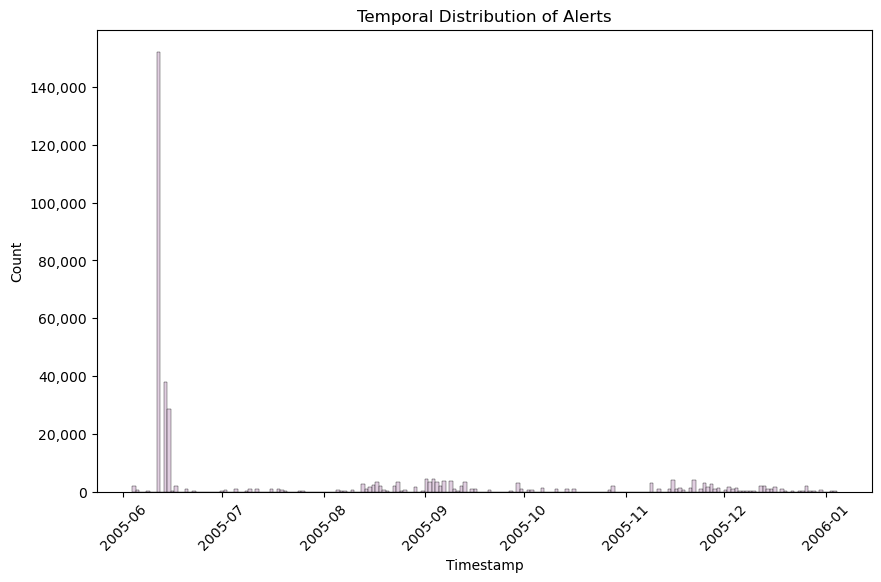


Time taken: 0.85 seconds


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import time

# Start timing
start_time = time.time()

# Function to format y-axis with commas
def y_format(value, tick_number):
    return f'{int(value):,}'

# Visualization: Temporal Distribution of Alerts
plt.figure(figsize=(10, 6))
sns.histplot(data=df_full_wip[df_full_wip['AlertStatus'] == 'Alert'], x='Timestamp', bins=200, color='thistle')
plt.title('Temporal Distribution of Alerts')
plt.xlabel('Timestamp')
plt.ylabel('Count')

# Format the y-axis numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_format))
plt.xticks(rotation=45)
plt.show()

# End timing
end_time = time.time()
duration = end_time - start_time
print(f"\nTime taken: {duration:.2f} seconds")